## Objective
The objective of this article is to:
<ul>
    <li>Describe how to augment the MNIST digits using the Tensorflow python library</li>
</ul>

## Assumptions
Throughout this article, we will assume that:
<ul>
    <li>You are familiar with the python programming language and its syntax</li>
    <li>You have python installed on your machine and are able to install relevant python libraries on your own</li>
    <li>You are familiar with the MNIST dataset and are able to visualize digits using python</li>
</ul>

## Main Content

### Step 1. Importing the MNIST dataset

In step 1, we will import the MNIST dataset using the tensorflow library. The imported dataset will be divided into train/test and input/output arrays. Use the following code to import the MNIST dataset:

In [1]:
from tensorflow.keras.datasets import mnist
(X_train, Y_train), (X_test, Y_test) = mnist.load_data()

If you are unfamiliar with the import process, check out the following tutorials:

https://mrdatascience.com/how-to-import-the-mnist-dataset-using-tensorflow/

https://mrdatascience.com/how-to-import-the-mnist-dataset-from-local-directory-using-tensorflow/

### Step 2. Identify and Plot Baseline Digits Using Matplotlib

In step 2, we will plot a subset of the MNIST images to help us understand the augmentation effects on the MNIST dataset. To plot a subset of MNIST images, use the following code. 

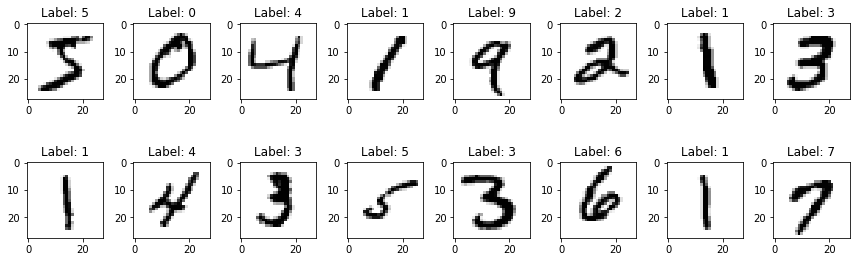

In [2]:
# import matplotlib's pyplot library to visualize MNIST images
import matplotlib.pyplot as plt
%matplotlib inline

# define number of images to show
num_row = 2
num_col = 8
num= num_row*num_col

# get images
images = X_train[0:num]
labels = Y_train[0:num]

# plot images
fig, axes = plt.subplots(num_row, num_col, figsize=(1.5*num_col,2*num_row))
for i in range(num):
    ax = axes[i//num_col, i%num_col]
    ax.imshow(images[i], cmap='gray_r')
    ax.set_title('Label: {}'.format(labels[i]))
plt.tight_layout()
plt.show()

If you are unfamiliar with the visualization code presented above, check out the following tutorial:

https://mrdatascience.com/how-to-plot-mnist-digits-using-matplotlib/

### Step 3. Understand Image Augmentation and Techniques Relevant To MNIST 

The original MNIST dataset contains centered, upright, and size normalized digits. Realistically, hand-written digits will seldom meet these criteria in real-world applications. Instead, some digits will be larger, smaller, rotated, or skewed more than others. To create a robust digit recognition model, it is in your interest to augment the MNIST dataset and capture these types of behavior. In step 3, we will go over the various types of augmentation techniques we can use to enhance the MNIST digit dataset. In this tutorial, we will use the ImageDataGenerator class available in the Tensorflow.Keras python library. You can find more information about this class here: https://keras.io/preprocessing/image/.

#### Rotation

The first type of transformation we will explore is "rotation". Image rotation transformations are performed using the rotation_range argument in the ImageDataGenerator class. This parameter is used to randomly rotate images about the image centroid up the rotation_range angle. The code below can be used to rotate MNIST images.

BEFORE:



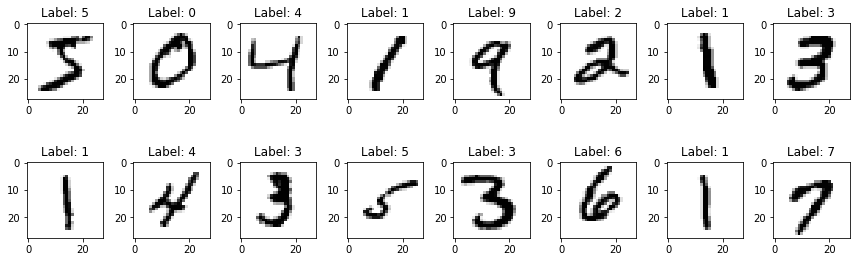

AFTER:



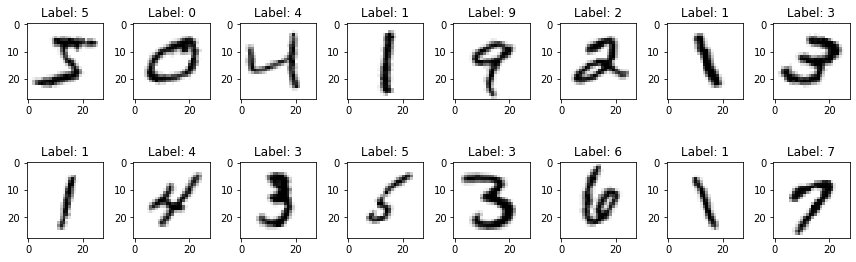

In [3]:
# specify the maximum rotation_range angle
rotation_range_val = 30

# import relevant library
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# create the class object
datagen = ImageDataGenerator(rotation_range=rotation_range_val)

# fit the generator
datagen.fit(X_train.reshape(X_train.shape[0], 28, 28, 1))

# define number of rows & columns
num_row = 2
num_col = 8
num= num_row*num_col

# plot before
print('BEFORE:\n')
# plot images
fig1, axes1 = plt.subplots(num_row, num_col, figsize=(1.5*num_col,2*num_row))
for i in range(num):
    ax = axes1[i//num_col, i%num_col]
    ax.imshow(X_train[i], cmap='gray_r')
    ax.set_title('Label: {}'.format(Y_train[i]))
plt.tight_layout()
plt.show()

# plot after
print('AFTER:\n')
fig2, axes2 = plt.subplots(num_row, num_col, figsize=(1.5*num_col,2*num_row))
for X, Y in datagen.flow(X_train.reshape(X_train.shape[0], 28, 28, 1), 
                         Y_train.reshape(Y_train.shape[0], 1), 
                         batch_size=num, 
                         shuffle=False):
    for i in range(0, num):
        ax = axes2[i//num_col, i%num_col]
        ax.imshow(X[i].reshape(28,28), cmap='gray_r')
        ax.set_title('Label: {}'.format(int(Y[i])))
    break
plt.tight_layout()
plt.show()

#### Shift

The second type of transformation we will explore is "shift". Image shift transformations are performed using the width_shift_range and height_shift_range arguments. These parameters are used to translate the image vertically or horizontally. The code below can be used to shift MNIST images.

BEFORE:



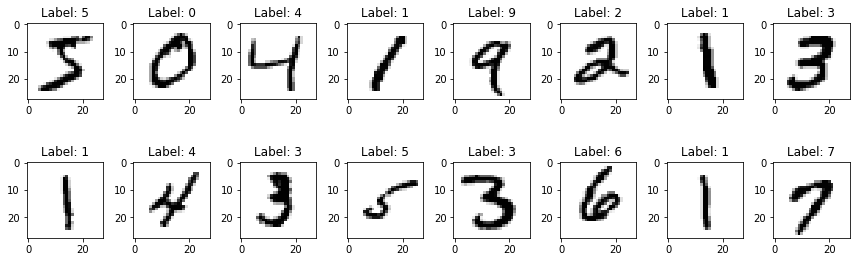

AFTER:



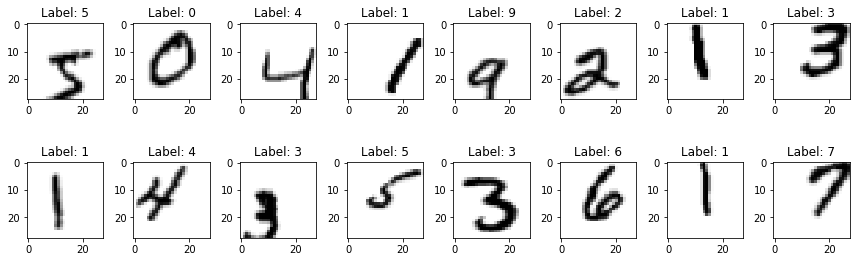

In [4]:
# specify the width and height shift arguments
width_shift_val = 0.25
height_shift_val = 0.25

# import relevant library
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# create the class object
datagen = ImageDataGenerator(width_shift_range=width_shift_val, height_shift_range=height_shift_val)

# fit the generator
datagen.fit(X_train.reshape(X_train.shape[0], 28, 28, 1))

# define number of rows & columns
num_row = 2
num_col = 8
num= num_row*num_col

# plot before
print('BEFORE:\n')
# plot images
fig1, axes1 = plt.subplots(num_row, num_col, figsize=(1.5*num_col,2*num_row))
for i in range(num):
    ax = axes1[i//num_col, i%num_col]
    ax.imshow(X_train[i], cmap='gray_r')
    ax.set_title('Label: {}'.format(Y_train[i]))
plt.tight_layout()
plt.show()

# plot after
print('AFTER:\n')
fig2, axes2 = plt.subplots(num_row, num_col, figsize=(1.5*num_col,2*num_row))
for X, Y in datagen.flow(X_train.reshape(X_train.shape[0], 28, 28, 1), 
                         Y_train.reshape(Y_train.shape[0], 1), 
                         batch_size=num, 
                         shuffle=False):
    for i in range(0, num):
        ax = axes2[i//num_col, i%num_col]
        ax.imshow(X[i].reshape(28,28), cmap='gray_r')
        ax.set_title('Label: {}'.format(int(Y[i])))
    break
plt.tight_layout()
plt.show()

#### Shear

The third type of transformation we will explore is "shear". Image shear transformations are performed using the shear_range argument. The shear transformation is used to displace pixels in a fixed direction (randomly selected up to shear_range value), by an amount proportional to its signed distance from the line that is parallel to that direction and goes through the origin. The code below can be used to shear MNIST images.

BEFORE:



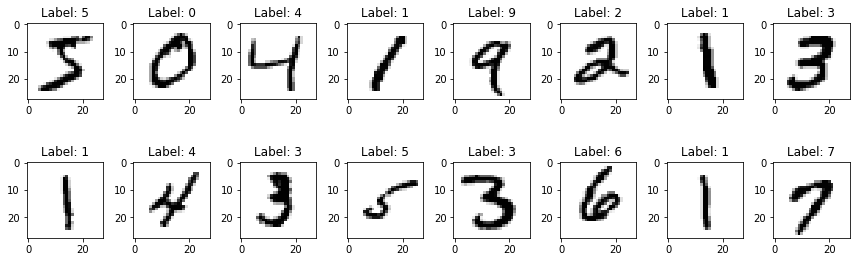

AFTER:



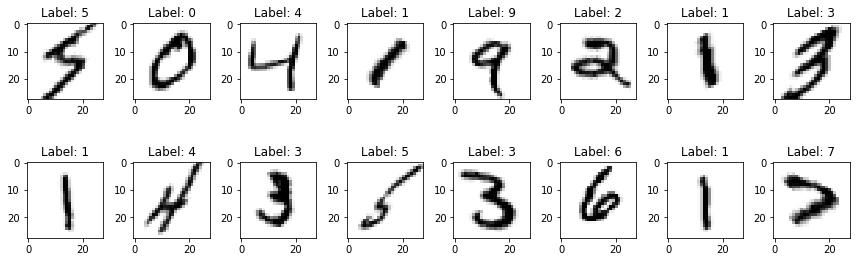

In [5]:
# specify the shear argument
shear_range_val=45

# import relevant library
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# create the class object
datagen = ImageDataGenerator(shear_range=shear_range_val)

# fit the generator
datagen.fit(X_train.reshape(X_train.shape[0], 28, 28, 1))

# define number of rows & columns
num_row = 2
num_col = 8
num= num_row*num_col

# plot before
print('BEFORE:\n')
# plot images
fig1, axes1 = plt.subplots(num_row, num_col, figsize=(1.5*num_col,2*num_row))
for i in range(num):
    ax = axes1[i//num_col, i%num_col]
    ax.imshow(X_train[i], cmap='gray_r')
    ax.set_title('Label: {}'.format(Y_train[i]))
plt.tight_layout()
plt.show()

# plot after
print('AFTER:\n')
fig2, axes2 = plt.subplots(num_row, num_col, figsize=(1.5*num_col,2*num_row))
for X, Y in datagen.flow(X_train.reshape(X_train.shape[0], 28, 28, 1), 
                         Y_train.reshape(Y_train.shape[0], 1), 
                         batch_size=num, 
                         shuffle=False):
    for i in range(0, num):
        ax = axes2[i//num_col, i%num_col]
        ax.imshow(X[i].reshape(28,28), cmap='gray_r')
        ax.set_title('Label: {}'.format(int(Y[i])))
    break
plt.tight_layout()
plt.show()

#### Zoom

The final type of transformation we will explore is "zoom". Image zoom transformations are performed using the zoom_range argument. The zoom transform is used to randomly scale the image up or down in the vertical and/or horizontal direction. The code below can be used to zoom MNIST images.

BEFORE:



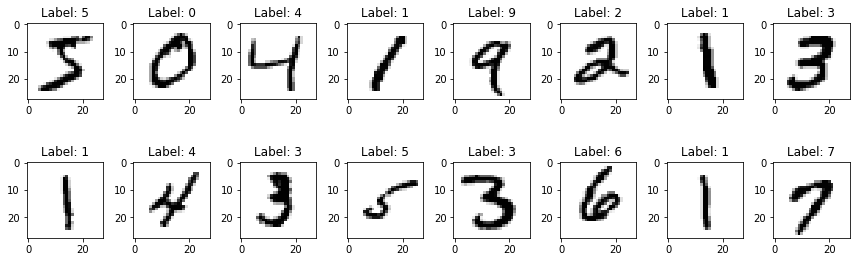

AFTER:



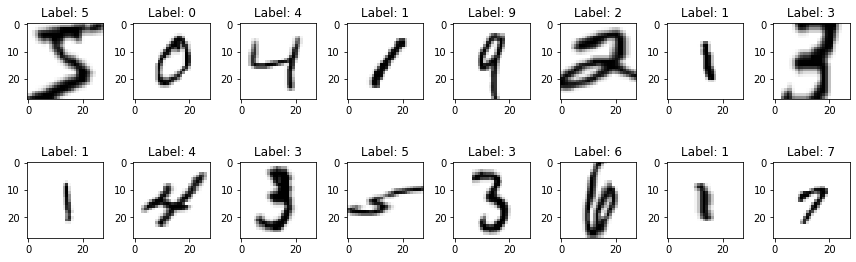

In [6]:
# specify the zoom argument
zoom_range_val=[0.5,1.5]

# import relevant library
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# create the class object
datagen = ImageDataGenerator(zoom_range=zoom_range_val)

# fit the generator
datagen.fit(X_train.reshape(X_train.shape[0], 28, 28, 1))

# define number of rows & columns
num_row = 2
num_col = 8
num= num_row*num_col

# plot before
print('BEFORE:\n')
# plot images
fig1, axes1 = plt.subplots(num_row, num_col, figsize=(1.5*num_col,2*num_row))
for i in range(num):
    ax = axes1[i//num_col, i%num_col]
    ax.imshow(X_train[i], cmap='gray_r')
    ax.set_title('Label: {}'.format(Y_train[i]))
plt.tight_layout()
plt.show()

# plot after
print('AFTER:\n')
fig2, axes2 = plt.subplots(num_row, num_col, figsize=(1.5*num_col,2*num_row))
for X, Y in datagen.flow(X_train.reshape(X_train.shape[0], 28, 28, 1), 
                         Y_train.reshape(Y_train.shape[0], 1), 
                         batch_size=num, 
                         shuffle=False):
    for i in range(0, num):
        ax = axes2[i//num_col, i%num_col]
        ax.imshow(X[i].reshape(28,28), cmap='gray_r')
        ax.set_title('Label: {}'.format(int(Y[i])))
    break
plt.tight_layout()
plt.show()

### Step 4. Augment The MNIST Dataset

Finally, we can combine all of the previously mentioned transformations to obtain unique digit representations that can now be used to improve digit recognition model performance. 

BEFORE:



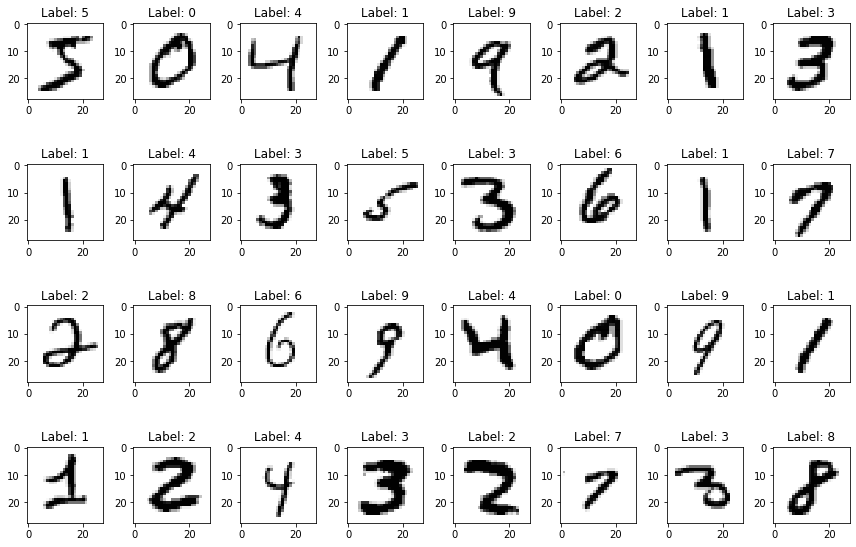

AFTER:



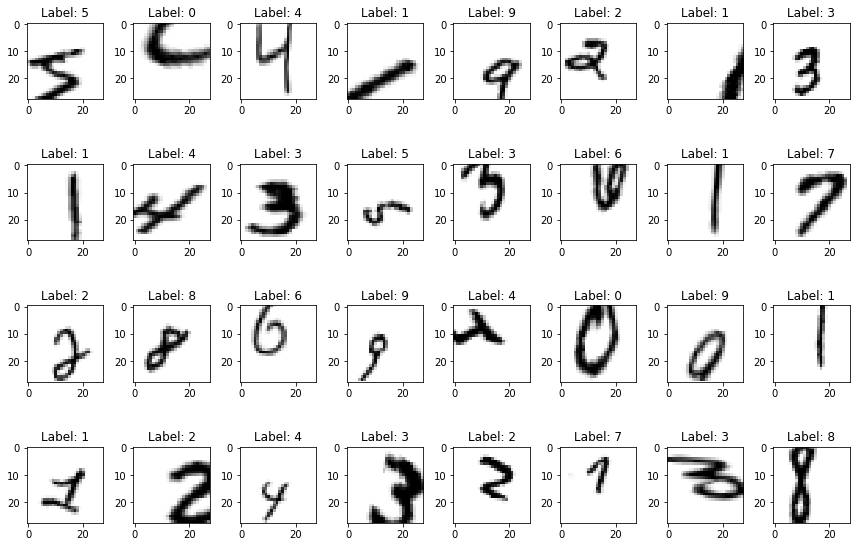

In [7]:
# specify the arguments
rotation_range_val = 30
width_shift_val = 0.25
height_shift_val = 0.25
shear_range_val=45
zoom_range_val=[0.5,1.5]

# import relevant library
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# create the class object
datagen = ImageDataGenerator(rotation_range = rotation_range_val, 
                             width_shift_range = width_shift_val,
                             height_shift_range = height_shift_val,
                             zoom_range=zoom_range_val,
                            )

# fit the generator
datagen.fit(X_train.reshape(X_train.shape[0], 28, 28, 1))

# define number of rows & columns
num_row = 4
num_col = 8
num= num_row*num_col

# plot before
print('BEFORE:\n')
# plot images
fig1, axes1 = plt.subplots(num_row, num_col, figsize=(1.5*num_col,2*num_row))
for i in range(num):
    ax = axes1[i//num_col, i%num_col]
    ax.imshow(X_train[i], cmap='gray_r')
    ax.set_title('Label: {}'.format(Y_train[i]))
plt.tight_layout()
plt.show()

# plot after
print('AFTER:\n')
fig2, axes2 = plt.subplots(num_row, num_col, figsize=(1.5*num_col,2*num_row))
for X, Y in datagen.flow(X_train.reshape(X_train.shape[0], 28, 28, 1), 
                         Y_train.reshape(Y_train.shape[0], 1), 
                         batch_size=num, 
                         shuffle=False):
    for i in range(0, num):
        ax = axes2[i//num_col, i%num_col]
        ax.imshow(X[i].reshape(28,28), cmap='gray_r')
        ax.set_title('Label: {}'.format(int(Y[i])))
    break
plt.tight_layout()
plt.show()

## Summary
After reading this document, you should:
<ul>
    <li>Know how to use ImageDataGenerator</li>
    <li>Understand how the rotation, shift, shear, and zoom transformations can be used to augment the MNIST dataset</li>
</ul>

## References
<p>[1] LeCun, Y. (n.d.). THE MNIST DATABASE. Retrieved January 5, 2020, from http://yann.lecun.com/exdb/mnist/.</p>
<p>[2] tf.keras.datasets.mnist.load_data  :   TensorFlow Core r2.1. (n.d.). Retrieved January 9, 2020, from https://www.tensorflow.org/api_docs/python/tf/keras/datasets/mnist/load_data.</p>
<p>[3] Image Preprocessing. (n.d.). Retrieved January 12, 2020, from https://keras.io/preprocessing/image/. </p>

## Connect With Mr Data Science:
<a href="https://www.mrdatascience.com">mrdatascience.com</a>,
<a href="https://gist.github.com/MrDataScience">GitHub</a>,
<a href="https://medium.com/@mrdatascience">Medium</a>,
<a href="https://www.youtube.com/channel/UCHQeKhLl99Ho6EF0MNZozWQ?view_as=subscriber">YouTube</a>
